# EDA: KNN

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# preprocess
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# import model
from sklearn.neighbors import KNeighborsClassifier

# Train-Test
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Load File

In [3]:
df = pd.read_csv('CLEANDATA/clean_data_N2.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882247 entries, 0 to 882246
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   LIGHTING_CONDITION         882247 non-null  object
 1   CRASH_TYPE                 882247 non-null  object
 2   DAMAGE                     882247 non-null  object
 3   NUM_UNITS                  882247 non-null  int64 
 4   MOST_SEVERE_INJURY         882247 non-null  object
 5   CRASH_HOUR                 882247 non-null  int64 
 6   CRASH_DAY_OF_WEEK          882247 non-null  int64 
 7   CRASH_MONTH                882247 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   882247 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  882247 non-null  object
 10  TRAFFICWAY_TYPE_N          882247 non-null  object
 11  ROAD_DEFECT_N              882247 non-null  object
 12  ROADWAY_SURFACE_COND_N     882247 non-null  object
 13  FIRST_CRASH_TYPE_N         882247 non-null  

In [4]:
df.head().T

,0,1,2,3,4
LIGHTING_CONDITION,DUSK,"DARKNESS, LIGHTED ROAD",DAYLIGHT,"DARKNESS, LIGHTED ROAD",DAYLIGHT
CRASH_TYPE,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH
DAMAGE,"OVER $1,500","OVER $1,500","OVER $1,500","OVER $1,500","OVER $1,500"
NUM_UNITS,2,2,4,2,2
MOST_SEVERE_INJURY,INCAPACITATING INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY
CRASH_HOUR,19,18,14,23,12
CRASH_DAY_OF_WEEK,3,6,7,4,6
CRASH_MONTH,9,9,7,8,8
SEC_CONTRIBUTORY_CAUSE_N,UNKNOWN,RECKLESS_DRIVING,RECKLESS_DRIVING,UNKNOWN,DISTRACTED
PRIM_CONTRIBUTORY_CAUSE_N,UNKNOWN,RECKLESS_DRIVING,DRIVING_EXPERIENCE,RECKLESS_DRIVING,RECKLESS_DRIVING


### Sample File

In [5]:
sample_df = df.sample(n=16000, random_state=1)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 597559 to 687717
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LIGHTING_CONDITION         16000 non-null  object
 1   CRASH_TYPE                 16000 non-null  object
 2   DAMAGE                     16000 non-null  object
 3   NUM_UNITS                  16000 non-null  int64 
 4   MOST_SEVERE_INJURY         16000 non-null  object
 5   CRASH_HOUR                 16000 non-null  int64 
 6   CRASH_DAY_OF_WEEK          16000 non-null  int64 
 7   CRASH_MONTH                16000 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   16000 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  16000 non-null  object
 10  TRAFFICWAY_TYPE_N          16000 non-null  object
 11  ROAD_DEFECT_N              16000 non-null  object
 12  ROADWAY_SURFACE_COND_N     16000 non-null  object
 13  FIRST_CRASH_TYPE_N         16000 non-null  object
 14  WEATH

## Work

### Train_Test_Split

In [6]:
X = sample_df.drop('DAMAGE', axis=1)
y = sample_df['DAMAGE']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((11200, 16), (4800, 16))

### Preprocessing

In [8]:
LE = LabelEncoder()
y_train_LE = LE.fit_transform(y_train)
y_test_LE = LE.transform(y_test)

In [9]:
ss = StandardScaler(with_mean=False)
encoder = OneHotEncoder(handle_unknown='ignore')

In [10]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [11]:
X_train_scaled = ss.fit_transform(X_train_encoded)
X_test_scaled = ss.transform(X_test_encoded)

### Hypertuning

In [12]:
model = KNeighborsClassifier()

In [13]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [14]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [15]:
grid_search.fit(X_train_scaled, y_train_LE)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
Best Cross-Validation Score: 0.6110714285714286


In [17]:
model = KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [18]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [19]:
model.score(X_train_scaled, y_train)

0.9950892857142857

In [20]:
model.score(X_test_scaled, y_test)

0.6177083333333333

In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.51      0.08      0.14       558
$501 - $1,500       0.30      0.14      0.19      1162
  OVER $1,500       0.66      0.90      0.76      3080

     accuracy                           0.62      4800
    macro avg       0.49      0.37      0.36      4800
 weighted avg       0.56      0.62      0.55      4800



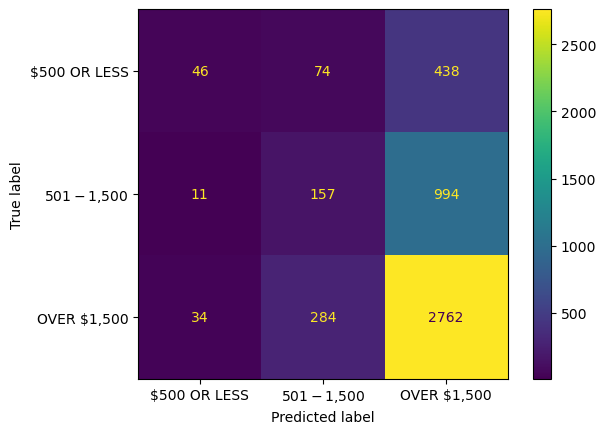

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()